In [252]:
import numpy as np
import cvxpy as cp
import scipy
from scipy import stats
import sklearn
import pandas as pd
import seaborn as sns
import bokeh
import matplotlib.pyplot as plt

In [253]:
data_snow = pd.read_csv('GIANT FOREST (USACE) (GNF).csv')
data_snow['DATE / TIME (PST)'] = pd.to_datetime(data_snow['DATE / TIME (PST)'], format = '%m/%d/%Y')
data_snow['MonthYear'] = data_snow['DATE / TIME (PST)'].dt.to_period('M')
data_snow = data_snow[(data_snow['MonthYear']<'2023-10')&(data_snow['MonthYear']>'2010-09')]
numeric_cols = ['SNOW WC INCHES', 'SNO ADJ INCHES', 'PPT INC INCHES', 'RAIN INCHES', 'PPTINC4 INCHES', 'TEMP MN DEG F','TEMP MX DEG F', 'TEMP AV DEG F']
for col in numeric_cols:
    data_snow[col] = pd.to_numeric(data_snow[col], errors='coerce')
data_snow

,DATE / TIME (PST),SNOW WC INCHES,SNO ADJ INCHES,Unnamed: 3,PPT INC INCHES,Unnamed: 5,RAIN INCHES,PPTINC4 INCHES,TEMP MN DEG F,TEMP MX DEG F,TEMP AV DEG F,MonthYear
1,2010-10-01,0.00,0.0,r,NaN,NaN,NaN,NaN,52.0,69.0,62.0,2010-10
2,2010-10-02,0.00,0.0,r,0.20,NaN,0.20,NaN,56.0,65.0,60.0,2010-10
3,2010-10-03,0.00,0.0,r,0.20,NaN,0.40,NaN,50.0,63.0,55.0,2010-10
4,2010-10-04,0.00,0.0,r,0.40,NaN,0.80,NaN,38.0,53.0,46.0,2010-10
5,2010-10-05,0.00,0.0,r,0.20,NaN,1.00,NaN,36.0,41.0,38.0,2010-10
...,...,...,...,...,...,...,...,...,...,...,...,...
4744,2023-09-26,0.26,0.0,r,0.00,NaN,92.21,0.00,52.0,64.0,57.0,2023-09
4745,2023-09-27,0.26,0.0,r,0.00,NaN,92.21,0.00,52.0,65.0,58.0,2023-09
4746,2023-09-28,0.27,0.0,r,0.00,NaN,92.21,0.00,52.0,64.0,56.0,2023-09
4747,2023-09-29,0.27,0.0,r,0.00,NaN,92.21,0.00,49.0,61.0,53.0,2023-09


In [254]:
dataSnowTrim=data_snow.drop(columns=['DATE / TIME (PST)','Unnamed: 3','Unnamed: 5','PPTINC4 INCHES'])
quant_cols=['SNOW WC INCHES','SNO ADJ INCHES','PPT INC INCHES','RAIN INCHES','TEMP MN DEG F','TEMP MX DEG F','TEMP AV DEG F']
agg_funcs = ['mean']
data_agg = {col: 'mean' for col in quant_cols}
GNFsnowAvg=dataSnowTrim.groupby('MonthYear').agg(data_agg).reset_index()
GNFsnowAvg=GNFsnowAvg.add_suffix('_(GNF)')
GNFsnowAvg



,MonthYear_(GNF),SNOW WC INCHES_(GNF),SNO ADJ INCHES_(GNF),PPT INC INCHES_(GNF),RAIN INCHES_(GNF),TEMP MN DEG F_(GNF),TEMP MX DEG F_(GNF),TEMP AV DEG F_(GNF)
0,2010-10,0.000000,0.000000,0.138462,1.426667,43.838710,55.322581,48.709677
1,2010-11,0.840000,0.072727,0.226667,6.200000,33.533333,44.300000,38.800000
2,2010-12,5.203226,5.216129,0.793548,20.070968,32.580645,42.580645,37.354839
3,2011-01,12.832258,12.832258,0.109677,37.251613,35.645161,46.129032,39.935484
4,2011-02,12.911111,12.867857,0.196429,40.328571,25.888889,37.185185,31.222222
...,...,...,...,...,...,...,...,...
151,2023-05,7.831000,4.175484,0.045161,87.261290,44.483871,56.161290,49.677419
152,2023-06,0.856000,0.000000,0.049000,88.338333,48.166667,61.966667,54.466667
153,2023-07,0.960645,0.000000,0.020323,89.451613,64.161290,79.000000,70.612903
154,2023-08,0.567419,0.000000,0.079032,90.767419,58.774194,73.612903,65.516129


In [255]:
data_snow1 = pd.read_csv('ALP-snowpack-oct2010-sep2023.csv')
data_snow1['DATE / TIME (PST)'] = pd.to_datetime(data_snow1['DATE / TIME (PST)'], format = '%m/%d/%Y')
data_snow1['MonthYear'] = data_snow1['DATE / TIME (PST)'].dt.to_period('M')
data_snow1 = data_snow1[(data_snow1['MonthYear']<'2023-10')&(data_snow1['MonthYear']>'2010-09')]
numeric_cols = ['SNOW WC INCHES', 'SNO ADJ INCHES', 'TEMP MN DEG F','TEMP MX DEG F', 'TEMP AV DEG F']

for col in numeric_cols:
    data_snow1[col] = pd.to_numeric(data_snow1[col], errors='coerce')

data_snow1


,DATE / TIME (PST),SNOW WC INCHES,SNO ADJ INCHES,TEMP MN DEG F,TEMP MX DEG F,TEMP AV DEG F,MonthYear
1,2010-10-01,-0.04,0.0,58.0,70.0,63.0,2010-10
2,2010-10-02,0.06,0.0,50.0,65.0,58.0,2010-10
3,2010-10-03,0.10,0.0,46.0,53.0,48.0,2010-10
4,2010-10-04,0.73,0.0,37.0,47.0,42.0,2010-10
5,2010-10-05,0.69,0.0,35.0,44.0,39.0,2010-10
...,...,...,...,...,...,...,...
4744,2023-09-26,0.00,0.0,43.0,57.0,48.0,2023-09
4745,2023-09-27,0.00,0.0,47.0,59.0,52.0,2023-09
4746,2023-09-28,0.00,0.0,45.0,59.0,51.0,2023-09
4747,2023-09-29,0.00,0.0,40.0,53.0,46.0,2023-09


In [256]:
dataSnowTrim1=data_snow1.drop(columns=['DATE / TIME (PST)'])
quant_cols=['SNOW WC INCHES','SNO ADJ INCHES','TEMP MN DEG F','TEMP MX DEG F','TEMP AV DEG F']
dataSnowTrim1

,SNOW WC INCHES,SNO ADJ INCHES,TEMP MN DEG F,TEMP MX DEG F,TEMP AV DEG F,MonthYear
1,-0.04,0.0,58.0,70.0,63.0,2010-10
2,0.06,0.0,50.0,65.0,58.0,2010-10
3,0.10,0.0,46.0,53.0,48.0,2010-10
4,0.73,0.0,37.0,47.0,42.0,2010-10
5,0.69,0.0,35.0,44.0,39.0,2010-10
...,...,...,...,...,...,...
4744,0.00,0.0,43.0,57.0,48.0,2023-09
4745,0.00,0.0,47.0,59.0,52.0,2023-09
4746,0.00,0.0,45.0,59.0,51.0,2023-09
4747,0.00,0.0,40.0,53.0,46.0,2023-09


In [257]:
agg_funcs = ['mean']
data_agg = {col: 'mean' for col in quant_cols}
ALPsnowAvg=dataSnowTrim1.groupby('MonthYear').agg(data_agg).reset_index()
ALPsnowAvg=ALPsnowAvg.add_suffix('_(ALP)')
ALPsnowAvg

,MonthYear_(ALP),SNOW WC INCHES_(ALP),SNO ADJ INCHES_(ALP),TEMP MN DEG F_(ALP),TEMP MX DEG F_(ALP),TEMP AV DEG F_(ALP)
0,2010-10,0.282333,0.000000,40.645161,51.451613,45.387097
1,2010-11,3.436552,3.501034,29.033333,41.500000,34.900000
2,2010-12,14.671290,14.921290,25.935484,35.483871,30.806452
3,2011-01,25.644516,25.894516,31.419355,42.967742,37.161290
4,2011-02,29.547857,29.797857,20.500000,34.321429,27.035714
...,...,...,...,...,...,...
151,2023-05,32.751935,32.751935,38.741935,49.709677,43.709677
152,2023-06,1.087333,0.837667,43.400000,57.800000,49.866667
153,2023-07,0.030968,0.000000,59.000000,72.806452,65.096774
154,2023-08,0.255161,0.000000,53.548387,67.451613,59.741935


In [258]:
data_snow2 = pd.read_csv('CHP-snowpack-oct2010-sep2023.csv')
data_snow2['DATE / TIME (PST)'] = pd.to_datetime(data_snow2['DATE / TIME (PST)'], format = '%m/%d/%Y')
data_snow2['MonthYear'] = data_snow2['DATE / TIME (PST)'].dt.to_period('M')
data_snow2 = data_snow2[(data_snow2['MonthYear']<'2023-10')&(data_snow2['MonthYear']>'2010-09')]
data_snow2

,DATE / TIME (PST),SNOW WC INCHES,SNO ADJ INCHES,SNOW DP INCHES,TEMP MN DEG F,TEMP MX DEG F,TEMP AV DEG F,MonthYear
1,2010-10-01,-0.89,0.0,0.0,41.0,53.0,46.0,2010-10
2,2010-10-02,-0.23,0.0,1.0,38.0,50.0,44.0,2010-10
3,2010-10-03,-0.31,0.0,2.0,33.0,47.0,40.0,2010-10
4,2010-10-04,0.33,0.0,1.0,25.0,44.0,35.0,2010-10
5,2010-10-05,-0.59,0.0,1.0,21.0,38.0,28.0,2010-10
...,...,...,...,...,...,...,...,...
4744,2023-09-26,-1.04,0.0,NaN,33.0,61.0,46.0,2023-09
4745,2023-09-27,-1.06,0.0,NaN,37.0,62.0,48.0,2023-09
4746,2023-09-28,-0.98,0.0,NaN,35.0,62.0,47.0,2023-09
4747,2023-09-29,-1.13,0.0,NaN,34.0,55.0,43.0,2023-09


In [259]:
dataSnowTrim2=data_snow2.drop(columns=['DATE / TIME (PST)'])
quant_cols=['SNOW WC INCHES','SNO ADJ INCHES','TEMP MN DEG F','TEMP MX DEG F','TEMP AV DEG F']

dataSnowTrim2
agg_funcs = ['mean']
data_agg = {col: 'mean' for col in quant_cols}
CHPsnowAvg=dataSnowTrim2.groupby('MonthYear').agg(data_agg).reset_index()
CHPsnowAvg=CHPsnowAvg.add_suffix('_(CHP)')
CHPsnowAvg

,MonthYear_(CHP),SNOW WC INCHES_(CHP),SNO ADJ INCHES_(CHP),TEMP MN DEG F_(CHP),TEMP MX DEG F_(CHP),TEMP AV DEG F_(CHP)
0,2010-10,-0.274194,0.284516,27.870968,46.451613,36.677419
1,2010-11,1.791667,2.505333,16.633333,40.366667,28.066667
2,2010-12,9.589032,10.459355,16.967742,37.096774,26.290323
3,2011-01,13.385806,14.750333,14.096774,42.032258,26.290323
4,2011-02,9.623214,NaN,7.785714,34.178571,20.857143
...,...,...,...,...,...,...
151,2023-05,45.885806,46.153548,22.580645,48.903226,35.709677
152,2023-06,21.183000,21.183000,28.233333,53.166667,40.733333
153,2023-07,-0.537742,0.039355,42.129032,67.548387,55.000000
154,2023-08,-0.603226,0.000000,38.838710,61.387097,50.096774


In [260]:
data_snow3 = pd.read_csv('ADIN MOUNTAIN (ADM).csv')
data_snow3['DATE / TIME (PST)'] = pd.to_datetime(data_snow3['DATE / TIME (PST)'], format = '%m/%d/%Y')
data_snow3['MonthYear'] = data_snow3['DATE / TIME (PST)'].dt.to_period('M')
data_snow3 = data_snow3[(data_snow3['MonthYear']<'2023-10')&(data_snow3['MonthYear']>'2010-09')]
data_snow3

,DATE / TIME (PST),SNOW WC INCHES,SNO ADJ INCHES,SNOW DP INCHES,TEMP MN DEG F,TEMP MX DEG F,TEMP AV DEG F,MonthYear
1,2010-10-01,NaN,0.0,NaN,41.0,77.0,62.0,2010-10
2,2010-10-02,0.5,0.0,0.0,39.0,73.0,57.0,2010-10
3,2010-10-03,0.6,0.0,0.0,44.0,55.0,50.0,2010-10
4,2010-10-04,0.6,0.0,0.0,36.0,46.0,44.0,2010-10
5,2010-10-05,0.5,0.0,0.0,34.0,45.0,40.0,2010-10
...,...,...,...,...,...,...,...,...
4744,2023-09-26,0.0,0.0,NaN,43.0,51.0,47.0,2023-09
4745,2023-09-27,0.1,0.0,NaN,40.0,55.0,46.0,2023-09
4746,2023-09-28,0.1,0.0,NaN,31.0,56.0,44.0,2023-09
4747,2023-09-29,0.0,0.0,NaN,28.0,54.0,42.0,2023-09


In [261]:
dataSnowTrim3=data_snow3.drop(columns=['DATE / TIME (PST)'])
quant_cols=['SNOW WC INCHES','SNO ADJ INCHES','TEMP MN DEG F','TEMP MX DEG F','TEMP AV DEG F']

dataSnowTrim3
agg_funcs = ['mean']
data_agg = {col: 'mean' for col in quant_cols}
ADMsnowAvg=dataSnowTrim3.groupby('MonthYear').agg(data_agg).reset_index()
ADMsnowAvg=ADMsnowAvg.add_suffix('_(ADM)')
ADMsnowAvg

,MonthYear_(ADM),SNOW WC INCHES_(ADM),SNO ADJ INCHES_(ADM),TEMP MN DEG F_(ADM),TEMP MX DEG F_(ADM),TEMP AV DEG F_(ADM)
0,2010-10,0.673077,0.000000,34.137931,52.482759,43.448276
1,2010-11,1.472414,1.046667,22.241379,40.379310,31.551724
2,2010-12,4.140000,3.635484,25.709677,35.354839,30.548387
3,2011-01,5.770968,5.946774,18.225806,40.741935,28.548387
4,2011-02,4.238462,3.762500,17.296296,35.703704,26.851852
...,...,...,...,...,...,...
151,2023-05,5.633333,3.167742,34.838710,57.322581,46.516129
152,2023-06,0.000000,0.000000,38.600000,63.100000,51.466667
153,2023-07,NaN,0.000000,44.000000,77.322581,62.419355
154,2023-08,0.000000,0.000000,43.129032,73.290323,59.419355


In [262]:
data_tempnprec = pd.read_csv('Project 170b - counties temp_prec.csv')
#data_tempnprec['MonthYear'] = pd.to_datetime(data_tempnprec[['Year', 'Month']].assign(Day=1))
#data_tempnprec['MonthYear']=data_tempnprec['MonthYear'].dt.to_period('M')
#data_tempnprec = data_tempnprec[(data_tempnprec['MonthYear']<'2023-10')&(data_tempnprec['MonthYear']>'2010-09')]
numeric_cols = ['Temperature', 'Precipitation']
for col in numeric_cols:
    data_tempnprec[col] = pd.to_numeric(data_tempnprec[col], errors='coerce')
data_tempnprec = data_tempnprec.drop(columns=['County'])
Region_piv = data_tempnprec.pivot_table(index='Date', columns='Region',values=['Temperature','Precipitation'], aggfunc='mean')
Region_piv = Region_piv.reset_index()
Region_piv


Date Precipitation                      Temperature             \
Region                Central      North     South     Central      North   
0       2010-10      2.467647   4.740937  1.716667   60.041176  58.090625   
1       2010-11      2.024706   4.461250  1.157778   48.000000  47.071875   
2       2010-12      8.355882  10.681250  6.982222   45.288235  44.106250   
3       2011-01      1.816471   1.972187  0.691111   43.811765  44.018750   
4       2011-02      3.535882   5.641875  2.600000   42.929412  42.428125   
..          ...           ...        ...       ...         ...        ...   
151     2023-05      0.706471   1.646875  0.503333   60.452941  58.437500   
152     2023-06      0.327647   0.502812  0.088889   65.235294  63.531250   
153     2023-07      0.019412   0.009375  0.007778   77.435294  72.646875   
154     2023-08      0.458235   0.385312  0.735556   74.141176  71.865625   
155     2023-09      0.286471   0.805625  0.265556   66.617647  64.250000   

                   
Region      South  
0       65.155556  
1       55.811111  
2       52.933333  
3       52.544444  
4       49.733333  
..            ...  
151     64.388889  
152     68.044444  
153     81.288889  
154     78.877778  
155     71.788889  

[156 rows x 7 columns]

In [263]:
data_drought = pd.read_csv('CA-drought-monitor.csv')
data_drought = data_drought[(data_drought['Week']<'2023-10-01') & (data_drought['Week']>'2010-09-30')]
data_drought

,Week,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI
31,2023-09-26,94.01,5.99,0.07,0.00,0.0,0.0,6
32,2023-09-19,93.53,6.47,0.24,0.00,0.0,0.0,7
33,2023-09-12,93.54,6.46,0.22,0.00,0.0,0.0,7
34,2023-09-05,93.53,6.47,0.22,0.00,0.0,0.0,7
35,2023-08-29,93.35,6.65,1.35,0.00,0.0,0.0,8
...,...,...,...,...,...,...,...,...
704,2010-11-02,90.14,9.86,4.62,0.19,0.0,0.0,15
705,2010-10-26,90.14,9.86,4.62,0.19,0.0,0.0,15
706,2010-10-19,88.08,11.92,6.07,0.24,0.0,0.0,18
707,2010-10-12,88.08,11.92,6.07,0.24,0.0,0.0,18


In [264]:

data_drought['Week'] = pd.to_datetime(data_drought['Week'], format = '%Y-%m-%d')
data_drought['Month']=data_drought['Week'].dt.to_period('M')
data_drought['Year'] = data_drought['Week'].dt.to_period('Y')
data_drought['D3']=data_drought['D3-D4']-data_drought['D4']
data_drought['D2']=data_drought['D2-D4']-data_drought['D3-D4']
data_drought['D1']=data_drought['D1-D4']-data_drought['D2-D4']
data_drought['D0']=data_drought['D0-D4']-data_drought['D1-D4']

In [265]:
quant_cols=['None','D0-D4','D0','D1','D2','D3','D4']
agg_funcs = ['mean']
data_agg = {col: agg_funcs for col in quant_cols}
yearAvg1=data_drought.groupby('Year').agg(data_agg).reset_index()
yearAvg=yearAvg1.drop(columns=['D0-D4'])
yearAvg2=yearAvg1.drop(columns=['D0','D1','D2','D3','D4'])


/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [266]:
data_drought_m=data_drought.groupby('Month').agg(data_agg).reset_index()
data_drought_m['Drought Status']=data_drought_m[['D0-D4']].ge(65).any(axis=1)
data_drought_m


,Month,None,D0-D4,D0,D1,D2,D3,D4,Drought Status
,,mean,mean,mean,mean,mean,mean,mean,
0,2010-10,87.9350,12.0650,5.8550,5.9825,0.2275,0.0,0.0,False
1,2010-11,88.4460,11.5540,7.8180,3.6220,0.1140,0.0,0.0,False
2,2010-12,87.9925,12.0075,11.1600,0.8475,0.0000,0.0,0.0,False
3,2011-01,99.6075,0.3925,0.3925,0.0000,0.0000,0.0,0.0,False
4,2011-02,88.6400,11.3600,11.3600,0.0000,0.0000,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
151,2023-05,69.1640,30.8360,25.0080,5.8280,0.0000,0.0,0.0,False
152,2023-06,71.8500,28.1500,23.5200,4.6300,0.0000,0.0,0.0,False
153,2023-07,73.1950,26.8050,20.9300,5.8750,0.0000,0.0,0.0,False


In [267]:
reservoir = pd.read_csv('Reservoir_data.csv',encoding='ISO-8859-1')
reservoir = reservoir.drop(columns=['Area'])
reservoir['MonthYear'] = pd.to_datetime(reservoir[['YEAR', 'MONTH']].assign(Day=1))
reservoir['MonthYear']=reservoir['MonthYear'].dt.to_period('M')
reservoir

,MONTH,YEAR,REGION,Number of\nReservoirs,Total Capacity\n \n 1000 AF,Hist Ave\n \n 1000 AF,Previous year \n \n 1000 AF,Current year \n \n 1000 AF,% \n \nAve,% \n \nCap,MonthYear
0,10,2010,North,6,3096.3,1917.7,1189.6,1860.1,97,60,2010-10
1,10,2010,North,13,540.5,287.2,312.0,340.8,119,63,2010-10
2,10,2010,Central,6,970.3,516.8,353.6,481.5,93,50,2010-10
3,10,2010,South,29,1973.8,1271.4,1127.9,1262.4,99,64,2010-10
4,10,2010,North,43,16001.1,9590.9,7228.3,10039.2,105,63,2010-10
...,...,...,...,...,...,...,...,...,...,...,...
1399,9,2023,North,43,16150.8,9403.7,6903.0,11502.1,122,71,2023-09
1400,9,2023,Central,34,11483.2,6433.4,4652.6,8857.3,138,77,2023-09
1401,9,2023,South,6,2087.5,610.0,322.9,1281.7,210,61,2023-09
1402,9,2023,North,5,1073.3,467.0,179.2,836.4,179,78,2023-09


In [268]:
numeric_cols = ['Number of\nReservoirs','Total Capacity\n \n 1000 AF','Hist Ave\n \n 1000 AF','Previous year \n \n 1000 AF','Current year \n \n 1000 AF','% \n \nAve','% \n \nCap']
for col in numeric_cols:
    reservoir[col] = pd.to_numeric(reservoir[col], errors='coerce')
Res_Region_piv = reservoir.pivot_table(index='MonthYear', columns='REGION',values=['Number of\nReservoirs','Total Capacity\n \n 1000 AF','Hist Ave\n \n 1000 AF','Previous year \n \n 1000 AF','Current year \n \n 1000 AF','% \n \nAve','% \n \nCap'], aggfunc='mean')
Res_Region_piv = Res_Region_piv.reset_index()
Res_Region_piv

MonthYear % \n \nAve                     % \n \nCap                    \
REGION              Central   North       South    Central  North      South   
0        2010-10      103.0   93.75  100.666667       55.5  52.50  53.333333   
1        2010-11      104.5   93.50  117.333333       56.0  53.50  63.666667   
2        2010-12      116.0  103.25  124.666667       64.5  61.50  64.666667   
3        2011-01      114.0   97.75  114.000000       69.0  62.75  63.666667   
4        2011-02      116.0   98.75  111.666667       75.0  67.25  66.000000   
..           ...        ...     ...         ...        ...    ...        ...   
150      2023-05      124.0  105.00   98.666667       83.5  74.50  65.333333   
151      2023-06      131.5  113.00  114.000000       86.5  78.25  76.333333   
152      2023-07      139.5  118.25  142.666667       85.0  76.50  84.000000   
153      2023-08      142.0  121.75  155.666667       79.0  71.75  78.666667   
154      2023-09      141.0  125.00  150.666667       74.0  67.50  71.000000   

       Current year \n \n 1000 AF                         ...  \
REGION                    Central     North        South  ...   
0                         3706.55  3124.700   738.033333  ...   
1                         3836.55  3116.275   785.733333  ...   
2                         4380.75  3505.250   924.333333  ...   
3                         4582.95  3575.925   919.533333  ...   
4                         4703.60  3821.425   937.333333  ...   
..                            ...       ...          ...  ...   
150                       5024.35  4533.150  1051.000000  ...   
151                       5500.45  4565.925  1208.933333  ...   
152                       5561.15  4265.525  1278.433333  ...   
153                       5140.15  3885.825  1161.700000  ...   
154                       4776.95  3615.975  1028.800000  ...   

       Hist Ave\n \n 1000 AF Number of\nReservoirs                    \
REGION                 South               Central  North      South   
0                 726.666667                  20.0  16.75  14.333333   
1                 727.766667                  20.0  17.75  14.333333   
2                 751.600000                  20.0  17.75  14.333333   
3                 800.400000                  20.0  17.75  14.333333   
4                 849.666667                  20.0  17.75  14.333333   
..                       ...                   ...    ...        ...   
150              1020.933333                  20.0  17.75  14.333333   
151              1011.300000                  20.0  17.75  14.333333   
152               890.866667                  20.0  17.75  14.333333   
153               784.166667                  20.0  17.75  14.333333   
154               727.666667                  20.0  17.75  14.333333   

       Previous year \n \n 1000 AF                        \
REGION                     Central     North       South   
0                          3045.15  2217.000  641.866667   
1                          2981.90  2135.025  641.233333   
2                          3131.60  2126.550  676.300000   
3                          3460.15  2597.300  742.666667   
4                          3769.55  2967.275  813.133333   
..                             ...       ...         ...   
150                        3331.45  2847.550  767.400000   
151                        3141.00  2729.750  692.433333   
152                        2820.40  2464.675  560.633333   
153                        2574.80  2231.325  504.633333   
154                        2430.70  2064.725  495.066667   

       Total Capacity\n \n 1000 AF                         
REGION                     Central     North        South  
0                          6205.10  5177.475  1487.900000  
1                          6205.10  5214.350  1487.900000  
2                          6205.10  5214.350  1487.900000  
3                          6205.10  5214.350  1487.900000  
4                          6205.10  5214.3

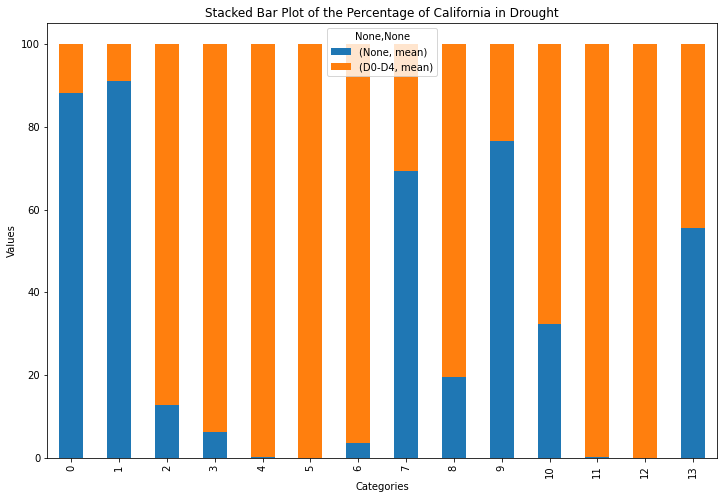

In [269]:
df_transposed = yearAvg2

# Plotting the bar plot
ax = df_transposed.plot(kind='bar',stacked=True, figsize=(12, 8))

# Set labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Categories')
ax.set_title('Stacked Bar Plot of the Percentage of California in Drought')

# Show the plot
plt.show()

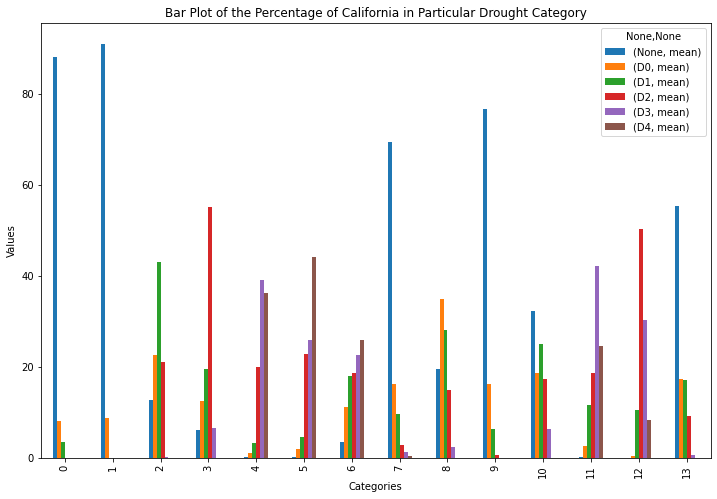

In [270]:
df_transposed = yearAvg

# Plotting the bar plot
ax = df_transposed.plot(kind='bar', figsize=(12, 8))

# Set labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Categories')
ax.set_title('Bar Plot of the Percentage of California in Particular Drought Category')

# Show the plot
plt.show()

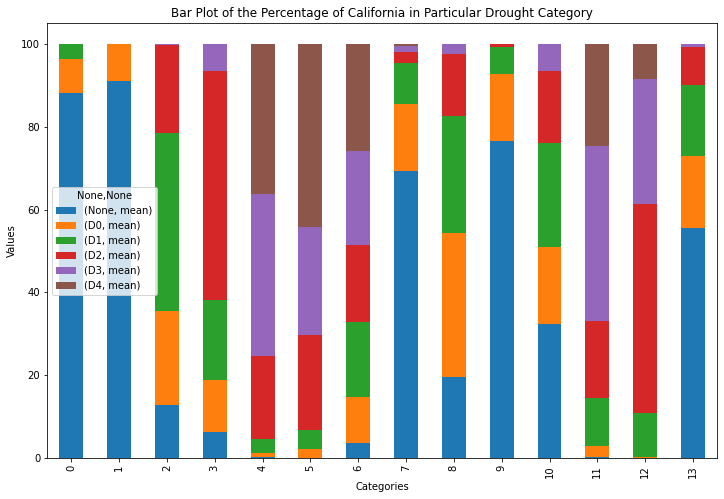

In [271]:
df_transposed = yearAvg

# Plotting the bar plot
ax = df_transposed.plot(kind='bar',stacked=True, figsize=(12, 8))

# Set labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Categories')
ax.set_title('Bar Plot of the Percentage of California in Particular Drought Category')

# Show the plot
plt.show()

In [272]:
drought=data_drought_m[['Drought Status','D0-D4']]
drought

,Drought Status,D0-D4
,,mean
0,False,12.0650
1,False,11.5540
2,False,12.0075
3,False,0.3925
4,False,11.3600
...,...,...
151,False,30.8360
152,False,28.1500
153,False,26.8050


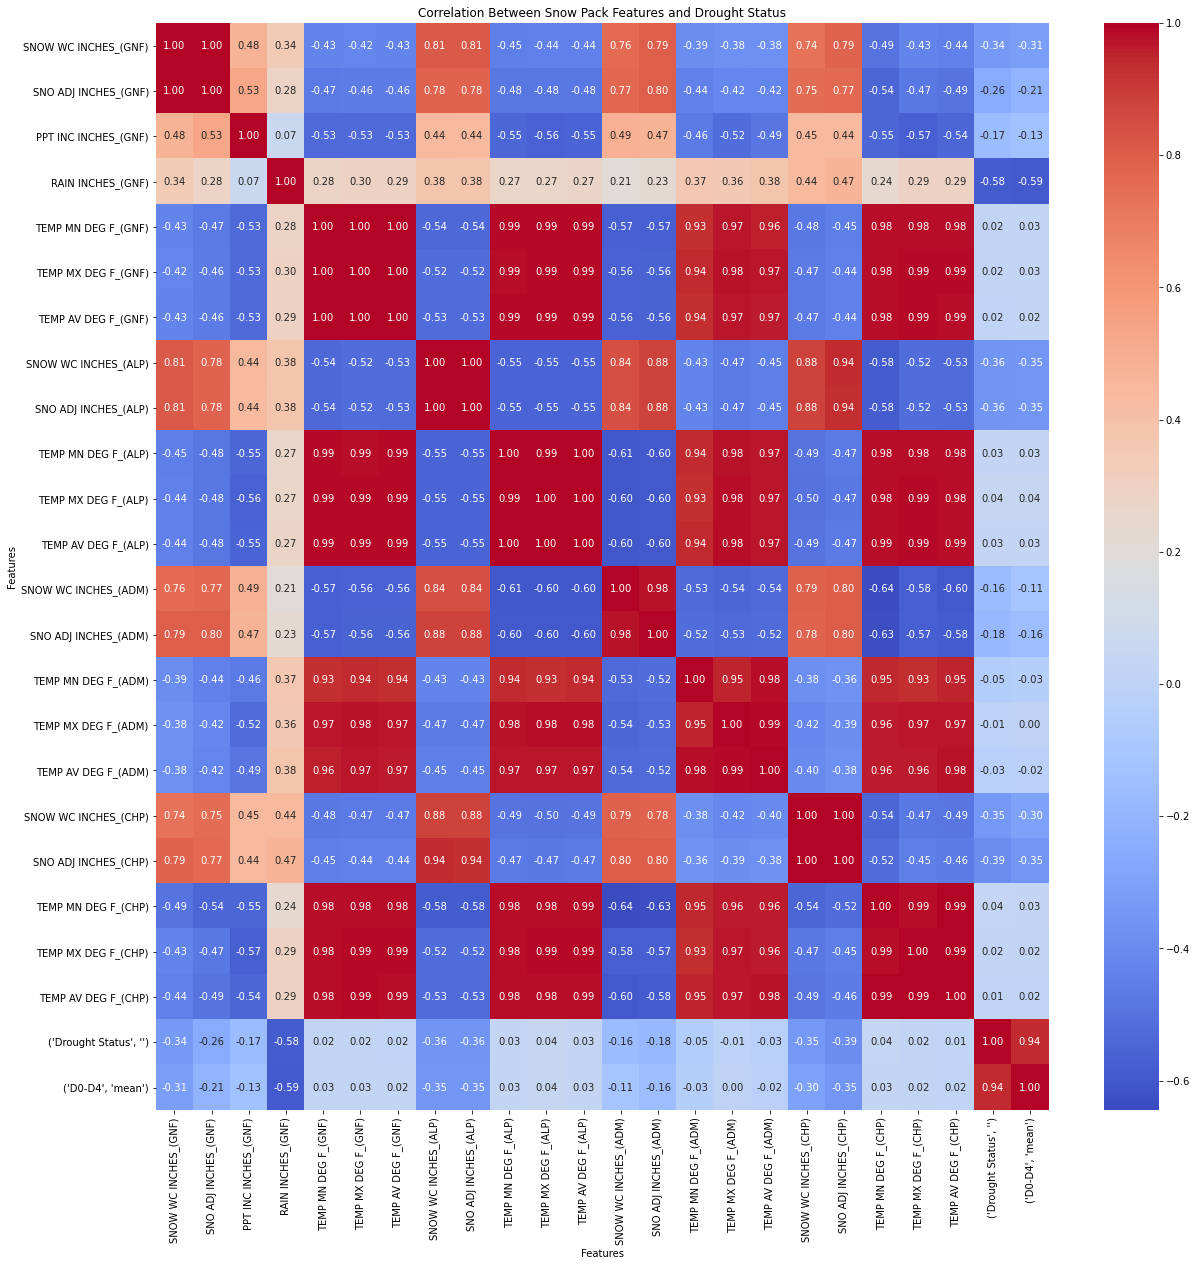

In [273]:
mountains=pd.concat([GNFsnowAvg,ALPsnowAvg,ADMsnowAvg,CHPsnowAvg,drought],axis=1)
mountains=mountains.drop(columns=['MonthYear_(GNF)','MonthYear_(ALP)','MonthYear_(CHP)','MonthYear_(ADM)'])
mountains1=mountains
mountains1
#mountains1=mountains.drop(columns=['drought'])
correlation_matrix=mountains.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Snow Pack Features and Drought Status')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [274]:
prec=Region_piv.drop(columns=['Date'])
preCorr=pd.concat([prec,drought],axis=1)

correlation_matrix1=preCorr.corr()
preCorr

/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Precipitation                      Temperature                        \
Region       Central      North     South     Central      North      South   
0           2.467647   4.740937  1.716667   60.041176  58.090625  65.155556   
1           2.024706   4.461250  1.157778   48.000000  47.071875  55.811111   
2           8.355882  10.681250  6.982222   45.288235  44.106250  52.933333   
3           1.816471   1.972187  0.691111   43.811765  44.018750  52.544444   
4           3.535882   5.641875  2.600000   42.929412  42.428125  49.733333   
..               ...        ...       ...         ...        ...        ...   
151         0.706471   1.646875  0.503333   60.452941  58.437500  64.388889   
152         0.327647   0.502812  0.088889   65.235294  63.531250  68.044444   
153         0.019412   0.009375  0.007778   77.435294  72.646875  81.288889   
154         0.458235   0.385312  0.735556   74.141176  71.865625  78.877778   
155         0.286471   0.805625  0.265556   66.617647  64.250000  71.788889   

       Drought Status    D0-D4  
Region                    mean  
0               False  12.0650  
1               False  11.5540  
2               False  12.0075  
3               False   0.3925  
4               False  11.3600  
..                ...      ...  
151             False  30.8360  
152             False  28.1500  
153             False  26.8050  
154             False  17.9560  
155             False   6.3475  

[156 rows x 8 columns]

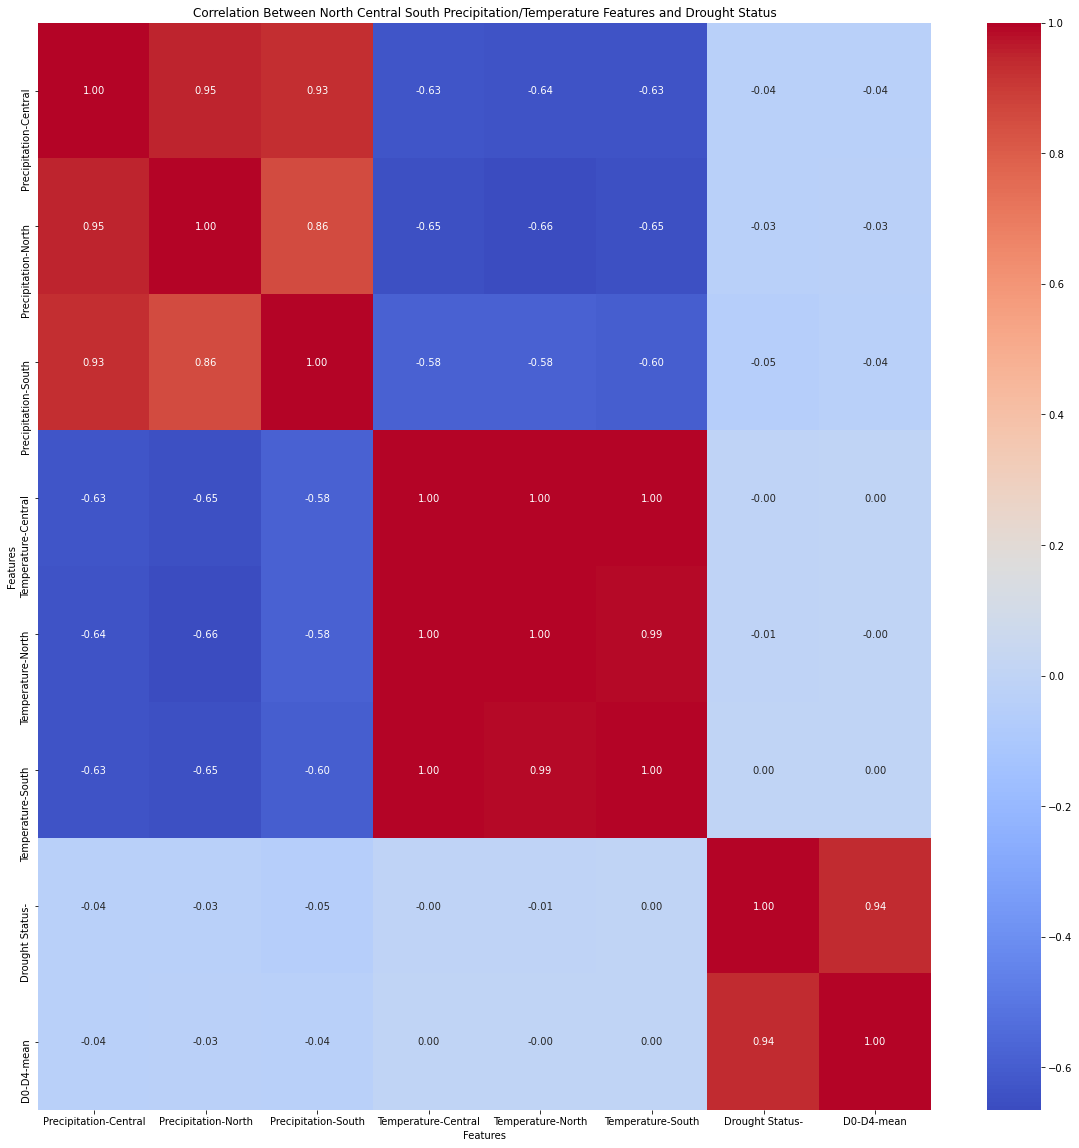

In [275]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between North Central South Precipitation/Temperature Features and Drought Status')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [276]:
Res_Region_piv.dtypes

                             REGION 
MonthYear                               period[M]
% \n \nAve                   Central      float64
                             North        float64
                             South        float64
% \n \nCap                   Central      float64
                             North        float64
                             South        float64
Current year \n \n 1000 AF   Central      float64
                             North        float64
                             South        float64
Hist Ave\n \n 1000 AF        Central      float64
                             North        float64
                             South        float64
Number of\nReservoirs        Central      float64
                             North        float64
                             South        float64
Previous year \n \n 1000 AF  Central      float64
                             North        float64
                             South        float64
Total Capacit

In [277]:
Res=Res_Region_piv.drop(columns=['MonthYear'])
ResCorr=pd.concat([Res,drought],axis=1)

correlation_matrix2=ResCorr.corr()
ResCorr

/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


% \n \nAve                     % \n \nCap                    \
REGION    Central   North       South    Central  North      South   
0           103.0   93.75  100.666667       55.5  52.50  53.333333   
1           104.5   93.50  117.333333       56.0  53.50  63.666667   
2           116.0  103.25  124.666667       64.5  61.50  64.666667   
3           114.0   97.75  114.000000       69.0  62.75  63.666667   
4           116.0   98.75  111.666667       75.0  67.25  66.000000   
..            ...     ...         ...        ...    ...        ...   
151         131.5  113.00  114.000000       86.5  78.25  76.333333   
152         139.5  118.25  142.666667       85.0  76.50  84.000000   
153         142.0  121.75  155.666667       79.0  71.75  78.666667   
154         141.0  125.00  150.666667       74.0  67.50  71.000000   
155           NaN     NaN         NaN        NaN    NaN        NaN   

       Current year \n \n 1000 AF                         \
REGION                    Central     North        South   
0                         3706.55  3124.700   738.033333   
1                         3836.55  3116.275   785.733333   
2                         4380.75  3505.250   924.333333   
3                         4582.95  3575.925   919.533333   
4                         4703.60  3821.425   937.333333   
..                            ...       ...          ...   
151                       5500.45  4565.925  1208.933333   
152                       5561.15  4265.525  1278.433333   
153                       5140.15  3885.825  1161.700000   
154                       4776.95  3615.975  1028.800000   
155                           NaN       NaN          NaN   

       Hist Ave\n \n 1000 AF  ... Number of\nReservoirs             \
REGION               Central  ...                 North      South   
0                    3317.60  ...                 16.75  14.333333   
1                    3367.00  ...                 17.75  14.333333   
2                    3488.35  ...                 17.75  14.333333   
3                    3744.10  ...                 17.75  14.333333   
4                    3914.50  ...                 17.75  14.333333   
..                       ...  ...                   ...        ...   
151                  4385.50  ...                 17.75  14.333333   
152                  4028.65  ...                 17.75  14.333333   
153                  3652.20  ...                 17.75  14.333333   
154                  3458.15  ...                 17.75  14.333333   
155                      NaN  ...                   NaN        NaN   

       Previous year \n \n 1000 AF                        \
REGION                     Central     North       South   
0                          3045.15  2217.000  641.866667   
1                          2981.90  2135.025  641.233333   
2                          3131.60  2126.550  676.300000   
3                          3460.15  2597.300  742.666667   
4                          3769.55  2967.275  813.133333   
..                             ...       ...         ...   
151                        3141.00  2729.750  692.433333   
152                        2820.40  2464.675  560.633333   
153                        2574.80  2231.325  504.633333   
154                        2430.70  2064.725  495.066667   
155                            NaN       NaN         NaN   

       Total Capacity\n \n 1000 AF                        Drought Status  \
REGION                     Central     North        South                  
0                          6205.10  5177.475  1487.900000          False   
1                          6205.10  5214.350  1487.900000          False   
2                          6205.10  5214.350  1487.900000          False   
3                          6205.10  5214.350  1487.900000          False   
4                          6205.10  5214.350  1487.900000          False   
..                             ...       ...          ...            ...   
151            

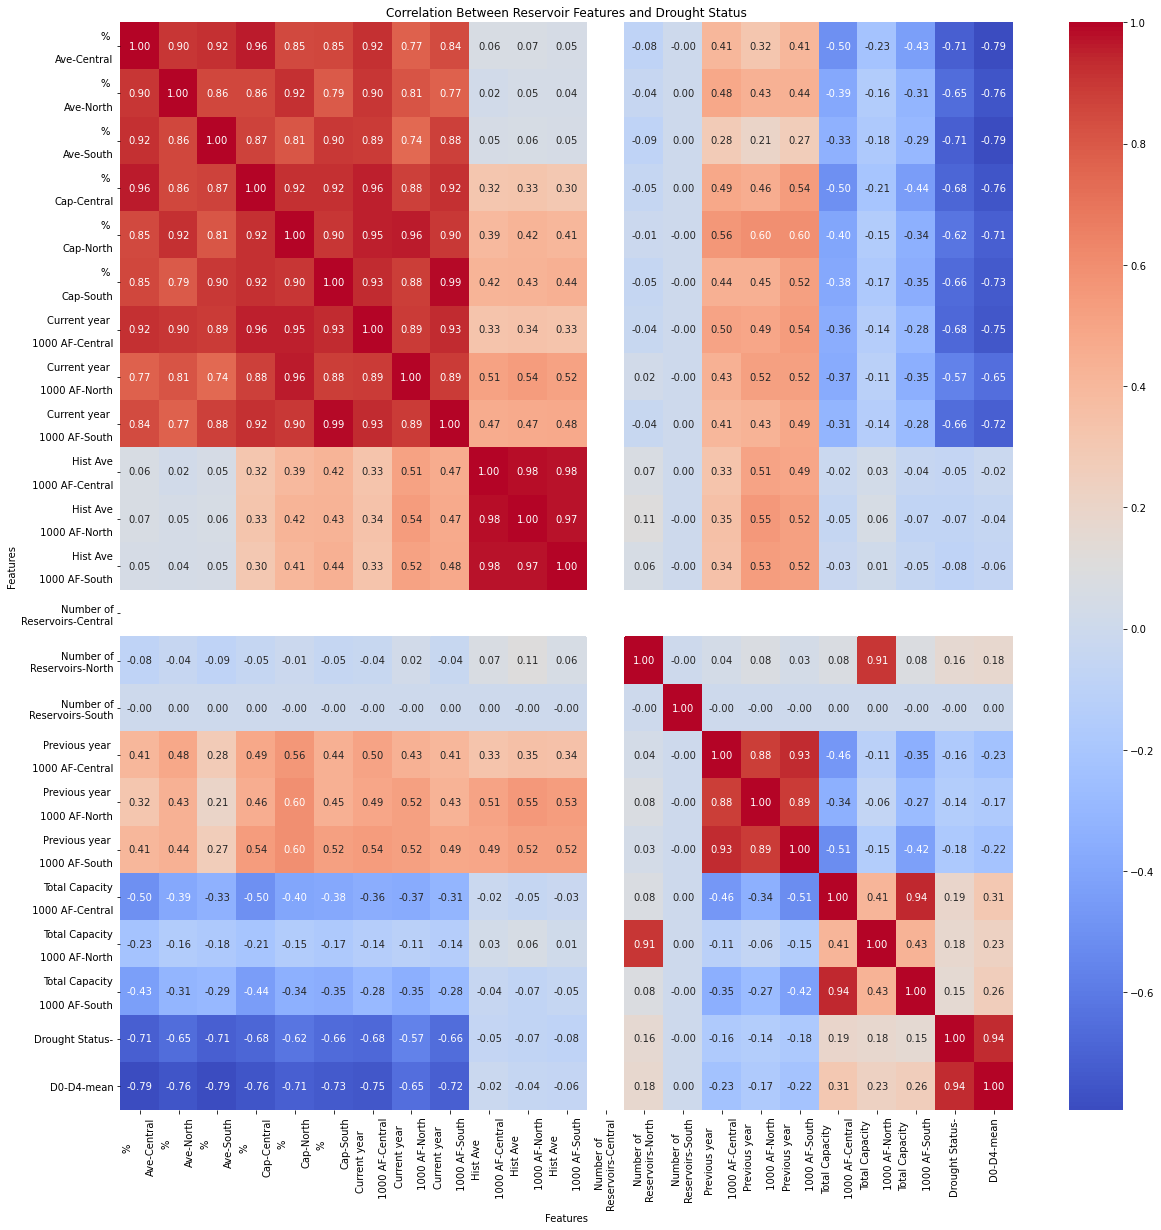

In [278]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Reservoir Features and Drought Status')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [279]:
bigdata=pd.concat([prec,Res_Region_piv,mountains],axis=1)
bigdata

,"(Precipitation, Central)","(Precipitation, North)","(Precipitation, South)","(Temperature, Central)","(Temperature, North)","(Temperature, South)","(MonthYear, )","(% \n \nAve, Central)","(% \n \nAve, North)","(% \n \nAve, South)",...,TEMP MN DEG F_(ADM),TEMP MX DEG F_(ADM),TEMP AV DEG F_(ADM),SNOW WC INCHES_(CHP),SNO ADJ INCHES_(CHP),TEMP MN DEG F_(CHP),TEMP MX DEG F_(CHP),TEMP AV DEG F_(CHP),"(Drought Status, )","(D0-D4, mean)"
0,2.467647,4.740937,1.716667,60.041176,58.090625,65.155556,2010-10,103.0,93.75,100.666667,...,34.137931,52.482759,43.448276,-0.274194,0.284516,27.870968,46.451613,36.677419,False,12.0650
1,2.024706,4.461250,1.157778,48.000000,47.071875,55.811111,2010-11,104.5,93.50,117.333333,...,22.241379,40.379310,31.551724,1.791667,2.505333,16.633333,40.366667,28.066667,False,11.5540
2,8.355882,10.681250,6.982222,45.288235,44.106250,52.933333,2010-12,116.0,103.25,124.666667,...,25.709677,35.354839,30.548387,9.589032,10.459355,16.967742,37.096774,26.290323,False,12.0075
3,1.816471,1.972187,0.691111,43.811765,44.018750,52.544444,2011-01,114.0,97.75,114.000000,...,18.225806,40.741935,28.548387,13.385806,14.750333,14.096774,42.032258,26.290323,False,0.3925
4,3.535882,5.641875,2.600000,42.929412,42.428125,49.733333,2011-02,116.0,98.75,111.666667,...,17.296296,35.703704,26.851852,9.623214,NaN,7.785714,34.178571,20.857143,False,11.3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.706471,1.646875,0.503333,60.452941,58.437500,64.388889,2023-06,131.5,113.00,114.000000,...,34.838710,57.322581,46.516129,45.885806,46.153548,22.580645,48.903226,35.709677,False,30.8360
152,0.327647,0.502812,0.088889,65.235294,63.531250,68.044444,2023-07,139.5,118.25,142.666667,...,38.600000,63.100000,51.466667,21.183000,21.183000,28.233333,53.166667,40.733333,False,28.1500
153,0.019412,0.009375,0.007778,77.435294,72.646875,81.288889,2023-08,142.0,121.75,155.666667,...,44.000000,77.322581,62.419355,-0.537742,0.039355,42.129032,67.548387,55.000000,False,26.8050
154,0.458235,0.385312,0.735556,74.141176,71.865625,78.877778,2023-09,141.0,125.00,150.666667,...,43.129032,73.290323,59.419355,-0.603226,0.000000,38.838710,61.387097,50.096774,False,17.9560


In [280]:
bigdata.set_index(('MonthYear', ''), inplace=True)

# Prepare the new DataFrame `df_avg`
columns_to_exclude = [('D0-D4', 'mean'), ('Drought Status', '')]
columns_to_include = bigdata.drop(columns=columns_to_exclude).columns

df_avg = pd.DataFrame(index=bigdata.index, columns=columns_to_include).astype(bigdata.dtypes[columns_to_include])

# Compute average values
for i in range(24, len(bigdata)):
    month = bigdata.index[i].month
    
    # Get data for the same month in the previous two years
    prev_year1 = bigdata[bigdata.index.year == bigdata.index[i].year - 1]
    prev_year2 = bigdata[bigdata.index.year == bigdata.index[i].year - 2]
    
    same_month_data = pd.concat([prev_year1[prev_year1.index.month == month], 
                                 prev_year2[prev_year2.index.month == month]])
    
    if not same_month_data.empty:
        # Calculate the mean and align it to the columns of df_avg
        mean_values = same_month_data.mean()
        df_avg.iloc[i] = mean_values.reindex(columns_to_include)

# Concatenate with the specific columns
df_avg = pd.concat([df_avg, bigdata[columns_to_exclude]], axis=1)

# Remove initial rows where averages are not calculated
df_avg = df_avg.iloc[24:]
df_avg


,"(Precipitation, Central)","(Precipitation, North)","(Precipitation, South)","(Temperature, Central)","(Temperature, North)","(Temperature, South)","(% \n \nAve, Central)","(% \n \nAve, North)","(% \n \nAve, South)","(% \n \nCap, Central)",...,TEMP MN DEG F_(ADM),TEMP MX DEG F_(ADM),TEMP AV DEG F_(ADM),SNOW WC INCHES_(CHP),SNO ADJ INCHES_(CHP),TEMP MN DEG F_(CHP),TEMP MX DEG F_(CHP),TEMP AV DEG F_(CHP),"(D0-D4, mean)","(Drought Status, )"
"(MonthYear, )",,,,,,,,,,,,,,,,,,,,,
2012-11,1.640294,3.478594,1.321667,47.891176,46.815625,55.488889,120.75,109.950,118.500000,65.25,...,22.720690,39.622989,31.359195,2.011833,3.114667,16.583333,40.816667,27.883333,92.2600,True
2012-12,8.355882,10.681250,6.982222,45.288235,44.106250,52.933333,116.00,103.250,124.666667,64.50,...,25.709677,35.354839,30.548387,9.589032,10.459355,16.967742,37.096774,26.290323,93.5075,True
2013-01,0.956471,1.272969,0.612222,42.947059,43.404687,50.905556,118.00,104.625,113.166667,71.75,...,18.196237,40.520968,28.524194,8.912737,9.263876,13.870968,39.629032,25.080645,71.0075,True
2013-02,3.044706,5.755781,1.779444,44.452941,43.476562,51.944444,113.75,101.875,109.500000,74.00,...,19.309438,38.303465,28.829152,5.602414,1.591290,13.892857,37.782834,25.154378,66.6460,True
2013-03,3.719412,6.704531,2.020000,46.855882,45.378125,54.466667,116.00,107.375,111.666667,79.75,...,22.842603,37.516685,30.355395,7.720323,4.480690,12.962736,36.082870,24.631813,78.9500,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06,0.075000,0.395781,0.013889,62.629412,59.634375,67.405556,57.75,62.625,70.666667,39.75,...,33.322581,55.870968,45.451613,-2.063871,0.000000,27.193548,50.967742,39.951613,30.8360,False
2023-07,0.112059,0.538125,0.029444,72.138235,67.998437,76.366667,55.75,60.750,66.333333,34.75,...,39.775862,67.103448,54.985893,-1.924833,0.000000,37.300000,61.733333,50.166667,28.1500,False
2023-08,0.132647,0.077969,0.156667,77.341176,72.790625,80.061111,56.00,59.625,67.666667,32.00,...,45.645161,78.758065,64.064516,-1.848710,0.000000,43.435484,67.274194,55.403226,26.8050,False


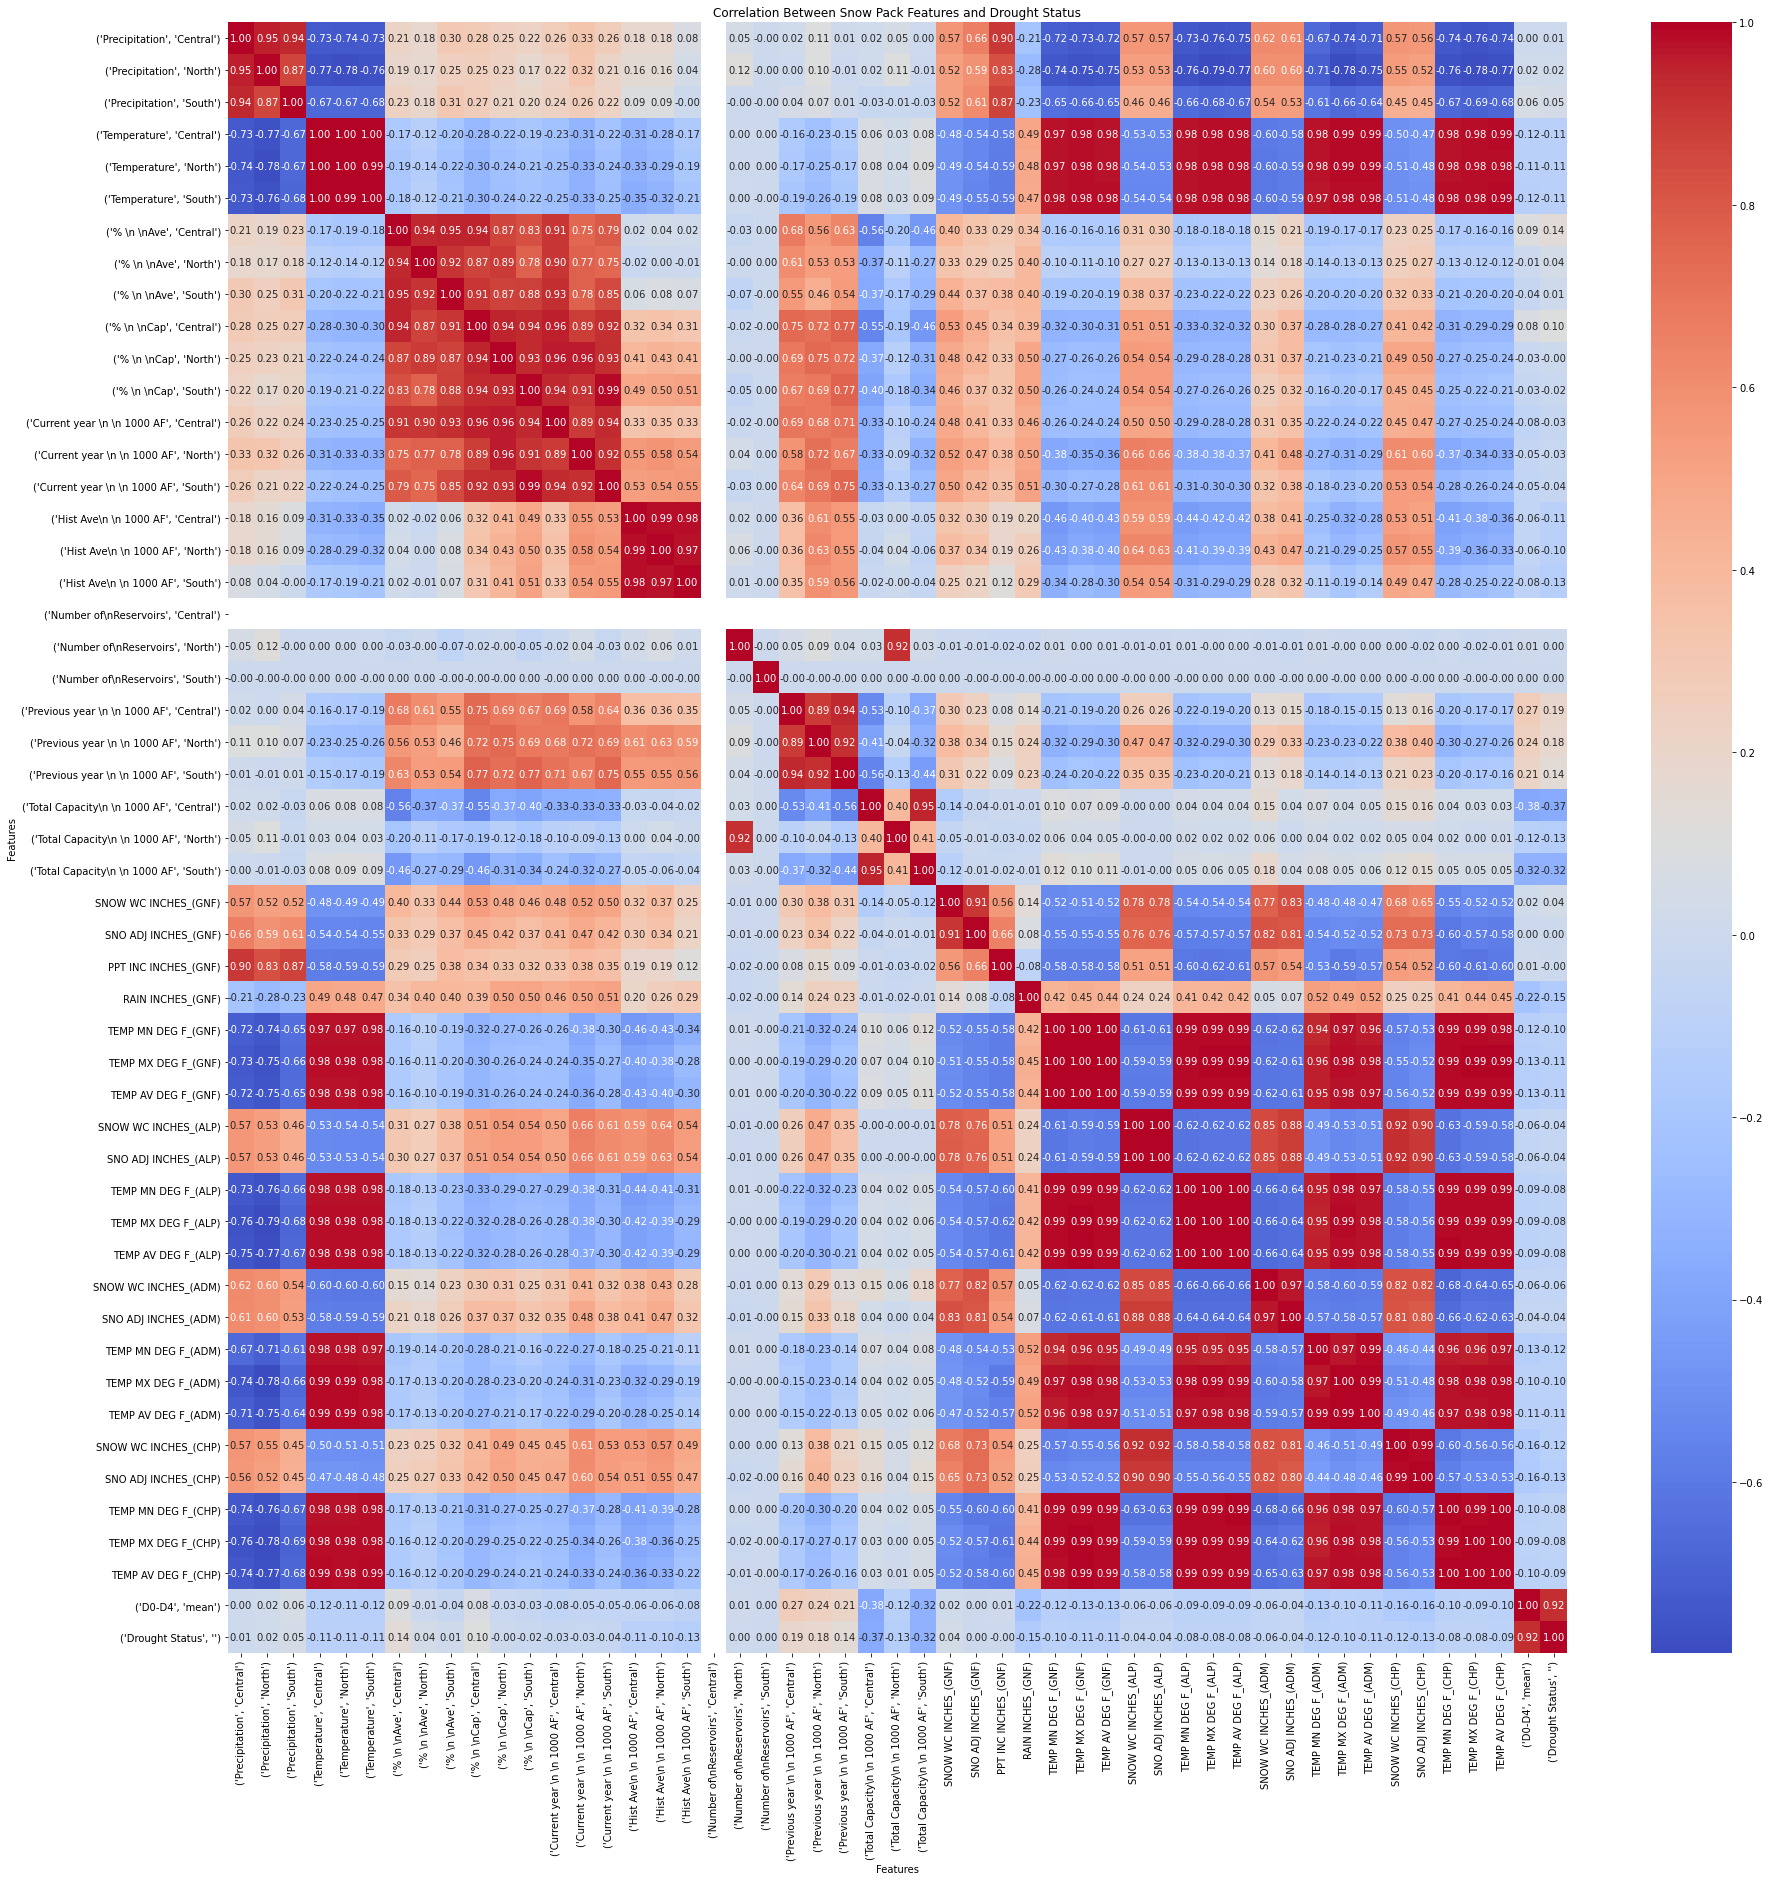

In [281]:
correlation_matrix12=df_avg.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix12, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Snow Pack Features and Drought Status')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [282]:
#df_avg.drop(columns=['MonthYear',''])
df_avg.dtypes
#data_drought_m

(Precipitation, Central)                  float64
(Precipitation, North)                    float64
(Precipitation, South)                    float64
(Temperature, Central)                    float64
(Temperature, North)                      float64
(Temperature, South)                      float64
(% \n \nAve, Central)                     float64
(% \n \nAve, North)                       float64
(% \n \nAve, South)                       float64
(% \n \nCap, Central)                     float64
(% \n \nCap, North)                       float64
(% \n \nCap, South)                       float64
(Current year \n \n 1000 AF, Central)     float64
(Current year \n \n 1000 AF, North)       float64
(Current year \n \n 1000 AF, South)       float64
(Hist Ave\n \n 1000 AF, Central)          float64
(Hist Ave\n \n 1000 AF, North)            float64
(Hist Ave\n \n 1000 AF, South)            float64
(Number of\nReservoirs, Central)          float64
(Number of\nReservoirs, North)            float64


In [283]:
# X = bigdata.iloc[:,0:51].values
# X12 = df_avg.iloc[:,0:51].values

# y = bigdata.iloc[:, 49].values
# y12 = df_avg.iloc[:,50].values


X12 = df_avg.iloc[:, 0:49].values  # Features (first 50 columns)
y12 = df_avg.iloc[:, 50].values    # Target variable (last column)

In [284]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#Ximputed= imputer.fit_transform(X)
Ximputed12= imputer.fit_transform(X12)

In [285]:
# from sklearn.model_selection import train_test_split

# #X_train, X_test, y_train, y_test = train_test_split(Ximputed, y, test_size = 0.2, random_state = 0)
# X12_train, X12_test, y12_train, y12_test = train_test_split(Ximputed12, y12, test_size = 0.2, random_state = 0)

In [286]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# X12_train = sc.fit_transform(X12_train)
# X12_test = sc.transform(X12_test)
X12_scale = sc.fit_transform(Ximputed12)
X12_scale

array([[ 1.03836689e-01,  2.51384072e-01,  3.89812134e-01, ...,
        -8.46691850e-01, -8.24774088e-01, -8.60226880e-01],
       [ 4.24589777e+00,  2.78263591e+00,  5.55679910e+00, ...,
        -8.09582629e-01, -1.18195378e+00, -1.00956766e+00],
       [-3.17934082e-01, -5.23745565e-01, -2.57772748e-01, ...,
        -1.10853244e+00, -9.38809346e-01, -1.12297190e+00],
       ...,
       [-8.26054481e-01, -9.43708123e-01, -6.73606423e-01, ...,
         1.74550401e+00,  1.71564650e+00,  1.71969432e+00],
       [-7.82879667e-01, -9.46618428e-01, -6.05653115e-01, ...,
         1.61004238e+00,  1.56232612e+00,  1.57000073e+00],
       [ 0.00000000e+00,  1.56067649e-16,  0.00000000e+00, ...,
        -3.42964325e-16,  0.00000000e+00,  6.66116072e-16]])

In [287]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
X12_pca = pca.fit_transform(X12_scale)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# X12_train = pca.fit_transform(X12_train)
# X12_test = pca.transform(X12_test)

explained_variance = pca.explained_variance_ratio_

In [288]:
# from sklearn.linear_model import LogisticRegression  

# classifier = LogisticRegression(random_state = 0)
# classifier12 = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)
# classifier12.fit(X12_train, y12_train)

In [289]:
# y_pred = classifier.predict(X_test)
# y12_pred = classifier12.predict(X12_test)
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# cm12 = confusion_matrix(y12_test, y12_pred)

In [290]:
pca_df = pd.DataFrame(data=X12_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
pca_df['target'] = y12
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5  target
0  2.844439 -0.138836 -6.166414  1.180523 -7.025698    True
1  7.342881  0.960840 -3.258148  5.554197 -0.877950    True
2  4.944705 -1.317398 -2.778413  0.347882 -1.122458    True
3  6.124643 -1.138353 -2.865052  0.488238 -0.857451    True
4  7.615771 -2.486598 -1.461155  0.298688 -1.108438    True


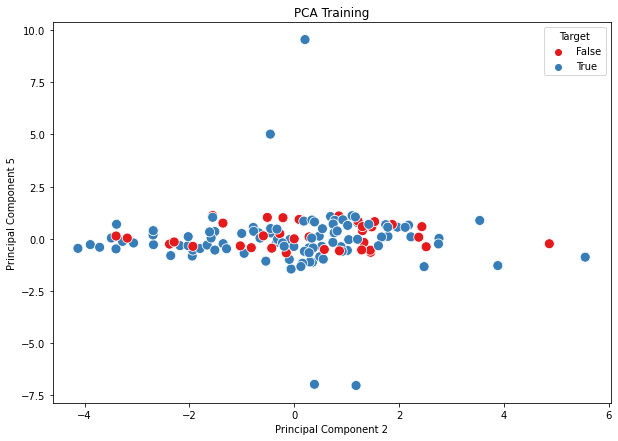

In [291]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC4', y='PC5',hue='target', data=pca_df, palette='Set1', s=100)
plt.title('PCA Training')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 5')
plt.legend(title='Target')
plt.show()


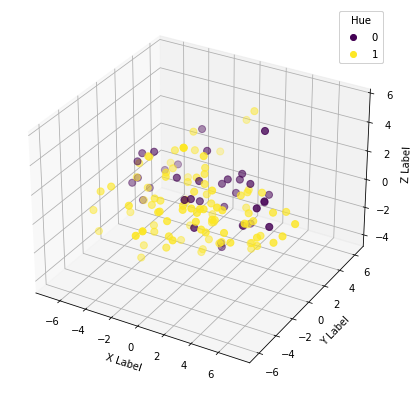

In [292]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(pca_df['PC2'], pca_df['PC3'], pca_df['PC4'], c=pd.Categorical(pca_df['target']).codes, cmap='viridis', s=50)

# Adding a legend
legend1 = ax.legend(*sc.legend_elements(), title="Hue")
ax.add_artist(legend1)

# Labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [293]:
loadings = pca.components_

# Create a DataFrame for better visualization
feature_names = df_avg.columns[:49]  # assuming first 50 columns are the features
pca_loadings_df = pd.DataFrame(loadings, columns=feature_names, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
print(pca_loadings_df)

     (Precipitation, Central)  (Precipitation, North)  (Precipitation, South)  \
PC1                  0.162244                0.161332                0.146299   
PC2                  0.083615                0.100222                0.079835   
PC3                  0.000210               -0.020822               -0.044605   
PC4                  0.212512                0.183243                0.226819   
PC5                  0.035489                0.084092                0.003906   

     (Temperature, Central)  (Temperature, North)  (Temperature, South)  \
PC1               -0.185287             -0.186798             -0.187222   
PC2               -0.123336             -0.117771             -0.115313   
PC3                0.100002              0.100221              0.093110   
PC4                0.043048              0.043807              0.057756   
PC5               -0.018544             -0.017585             -0.017054   

     (% \n \nAve, Central)  (% \n \nAve, North)  (% \n \nAve, 

In [294]:
from sklearn.model_selection import train_test_split
# X = pca_df.drop(columns=['target'])
# y = pca_df['target']
X= X12_scale
y=pca_df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [303]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to test
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create a Lasso regression model
lasso = Lasso(random_state=0)

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Lasso Model Parameters: {best_model.get_params()}')
print(f'Mean Squared Error (Lasso): {mse}')
print(f'R^2 Score (Lasso): {r2}')

Best Lasso Model Parameters: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Mean Squared Error (Lasso): 0.17398226668617967
R^2 Score (Lasso): 0.16557189201167777


/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e-01, tolerance: 1.714e-03
  model = cd_fast.enet_coordinate_descent(
/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.509e-01, tolerance: 1.714e-03
  model = cd_fast.enet_coordinate_descent(
/Users/christophervu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [296]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=1.0, random_state=0)  # You can adjust alpha as needed

# Train the model
ridge.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'R^2 Score (Ridge): {r2_ridge}')

Mean Squared Error (Ridge): 0.16604921429487746
R^2 Score (Ridge): 0.2036192288094364


In [297]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust n_estimators as needed

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest Regressor): {mse_rf}')
print(f'R^2 Score (Random Forest Regressor): {r2_rf}')

Mean Squared Error (Random Forest Regressor): 0.1458074074074074
R^2 Score (Random Forest Regressor): 0.3007000000000001


In [298]:
from sklearn.metrics import classification_report,confusion_matrix
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('\nLogistic Regression')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))


Logistic Regression
Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

       False       0.57      0.50      0.53         8
        True       0.80      0.84      0.82        19

    accuracy                           0.74        27
   macro avg       0.69      0.67      0.68        27
weighted avg       0.73      0.74      0.74        27

[[ 4  4]
 [ 3 16]]


In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=0)
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

# Fit the model on the entire training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred2 = dtc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)

# Print evaluation metrics
print('\nDecision Tree Classifier')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Cross-Validation Scores: [0.85714286 0.80952381 0.85714286 0.80952381 0.9047619 ]
Mean Cross-Validation Score: 0.8476190476190476
Standard Deviation of Cross-Validation Scores: 0.03563483225498991

Decision Tree Classifier
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

       False       1.00      0.25      0.40         8
        True       0.76      1.00      0.86        19

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27

[[ 2  6]
 [ 0 19]]


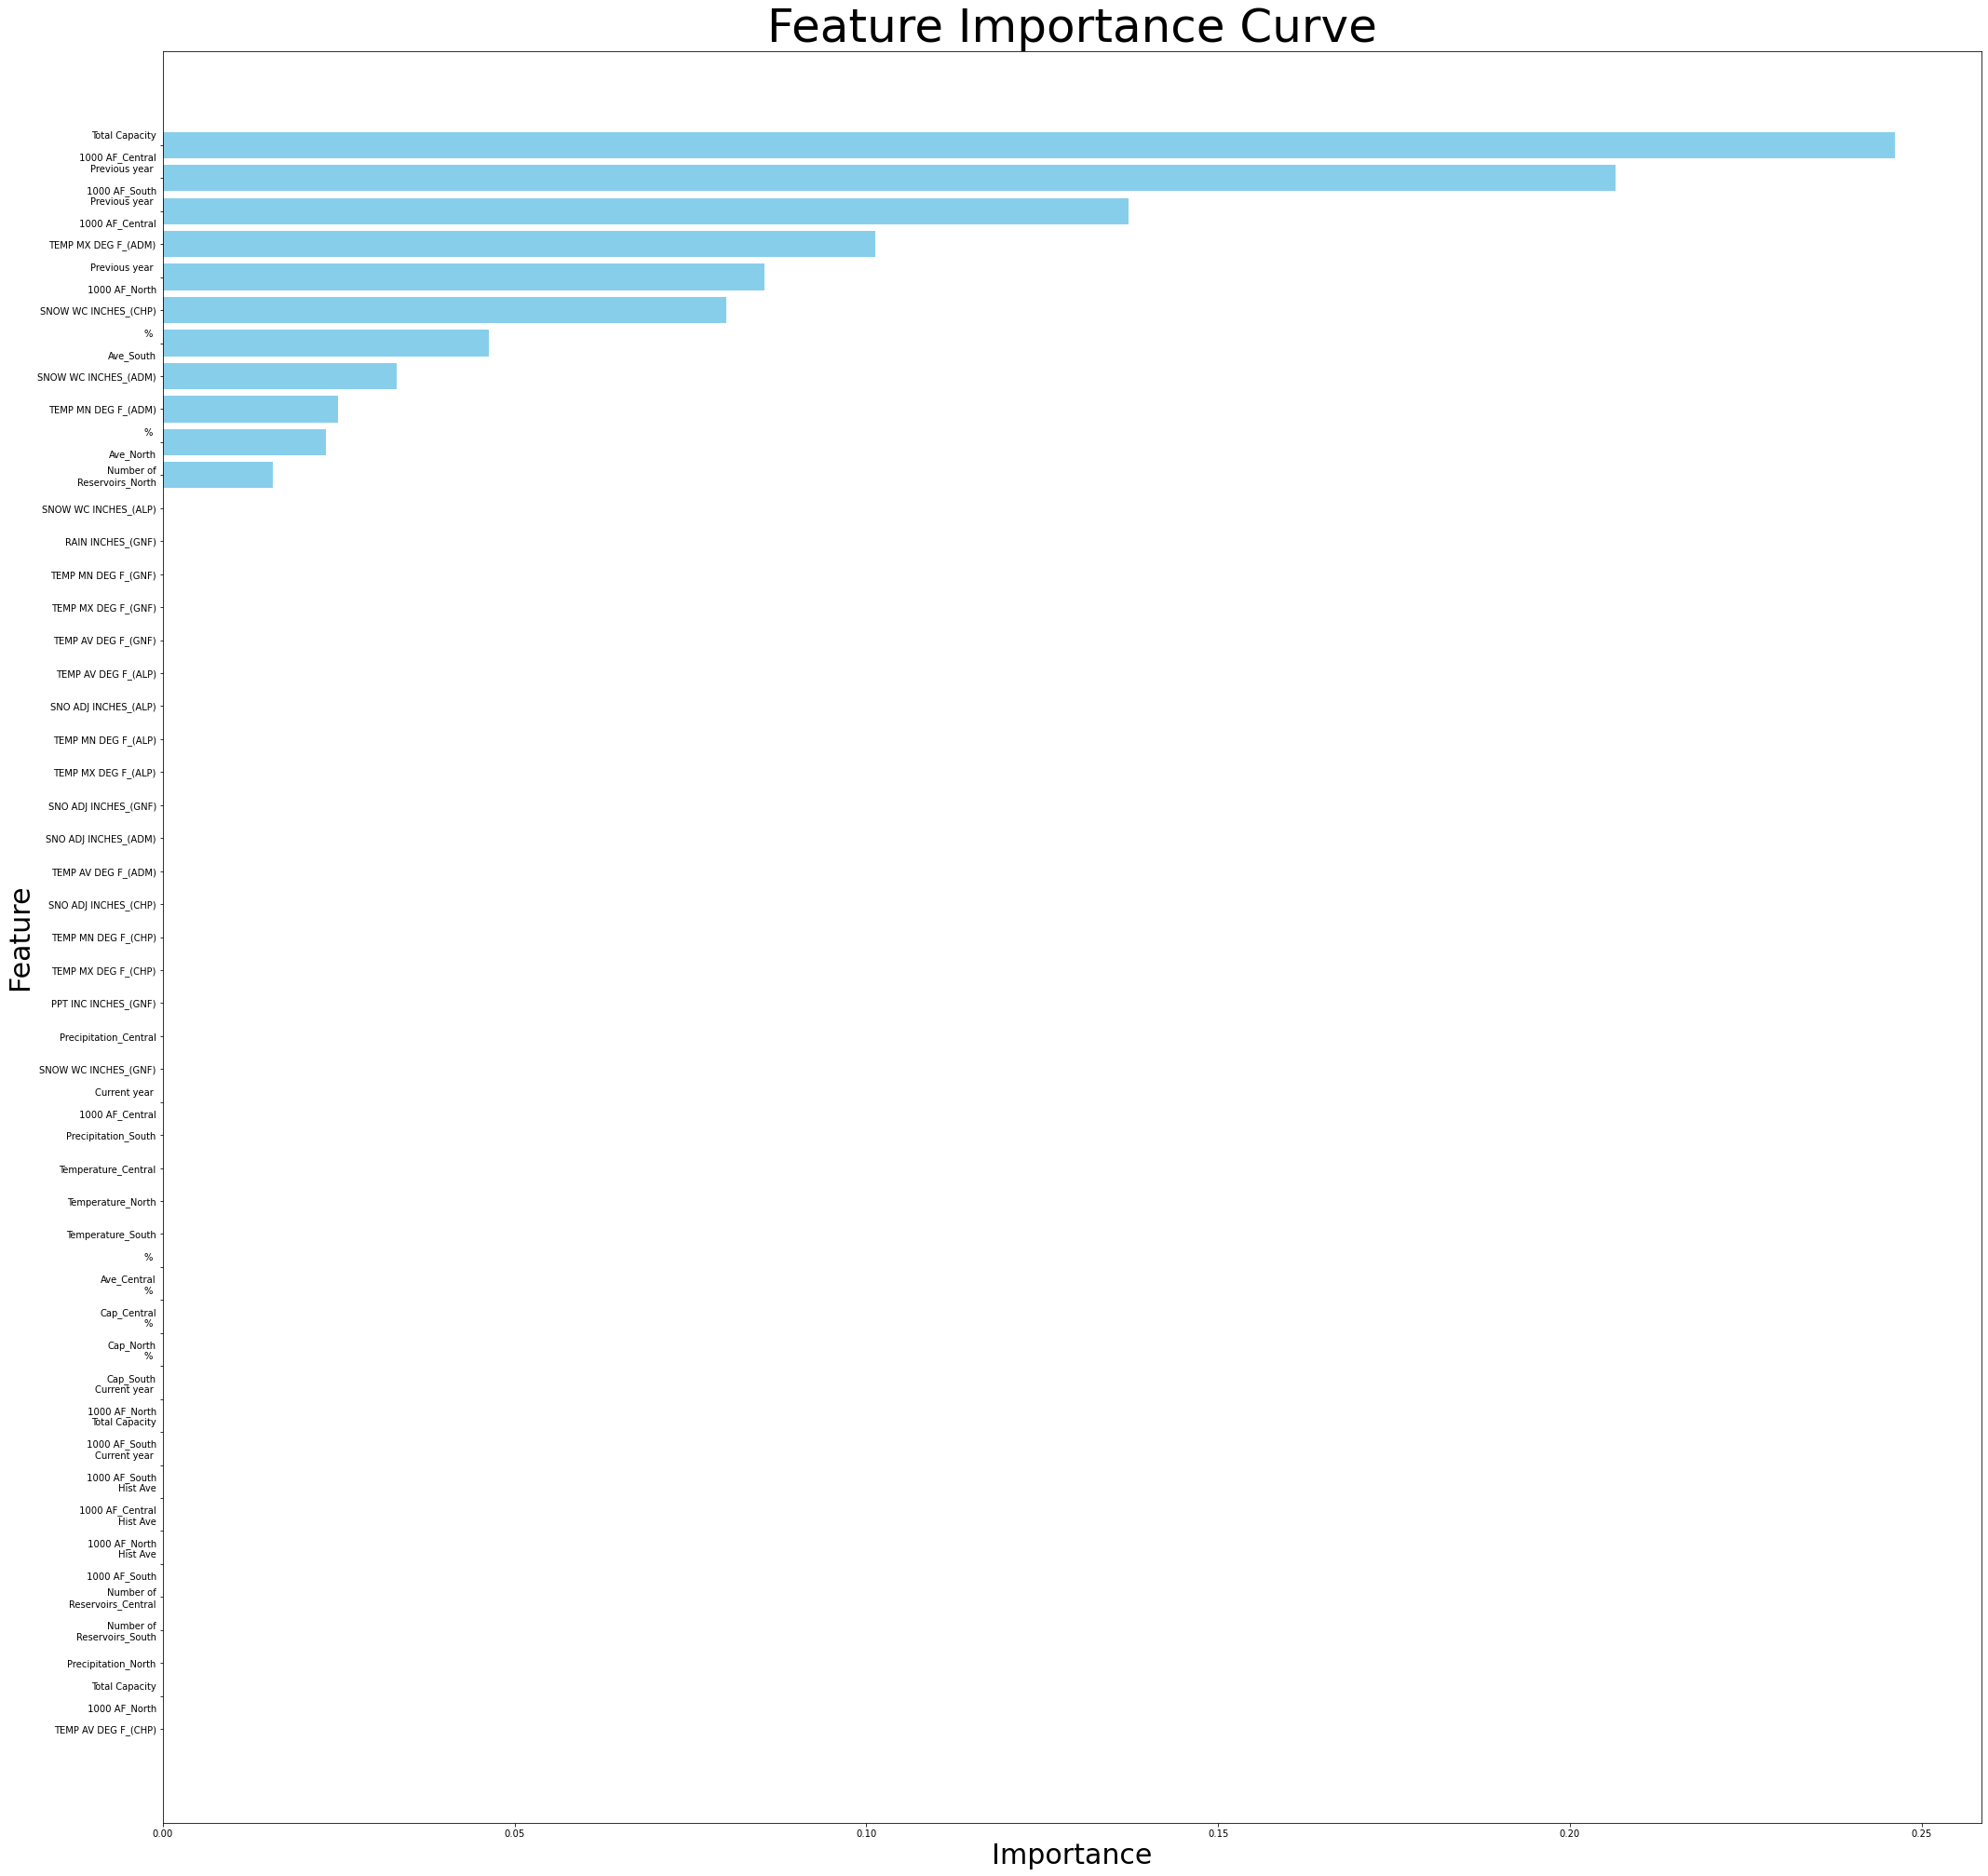

In [300]:
feature_importances = dtc.feature_importances_
feature_importances

# Convert tuples to strings
feature_names = [f'{feat[0]}_{feat[1]}' if isinstance(feat, tuple) else feat for feat in feature_names]
# Create a DataFrame for easy plotting
features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
features

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(35, 35))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance',size=30)
plt.ylabel('Feature',size=30)
plt.title('Feature Importance Curve',size=50)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Random Forest Classifier
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

       False       1.00      0.25      0.40         8
        True       0.76      1.00      0.86        19

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27

[[ 2  6]
 [ 0 19]]
Cross-Validation Scores: [0.71428571 0.71428571 0.95238095 0.76190476 0.80952381]
Mean Cross-Validation Score: 0.7904761904761906
Standard Deviation of Cross-Validation Scores: 0.08832017614757812


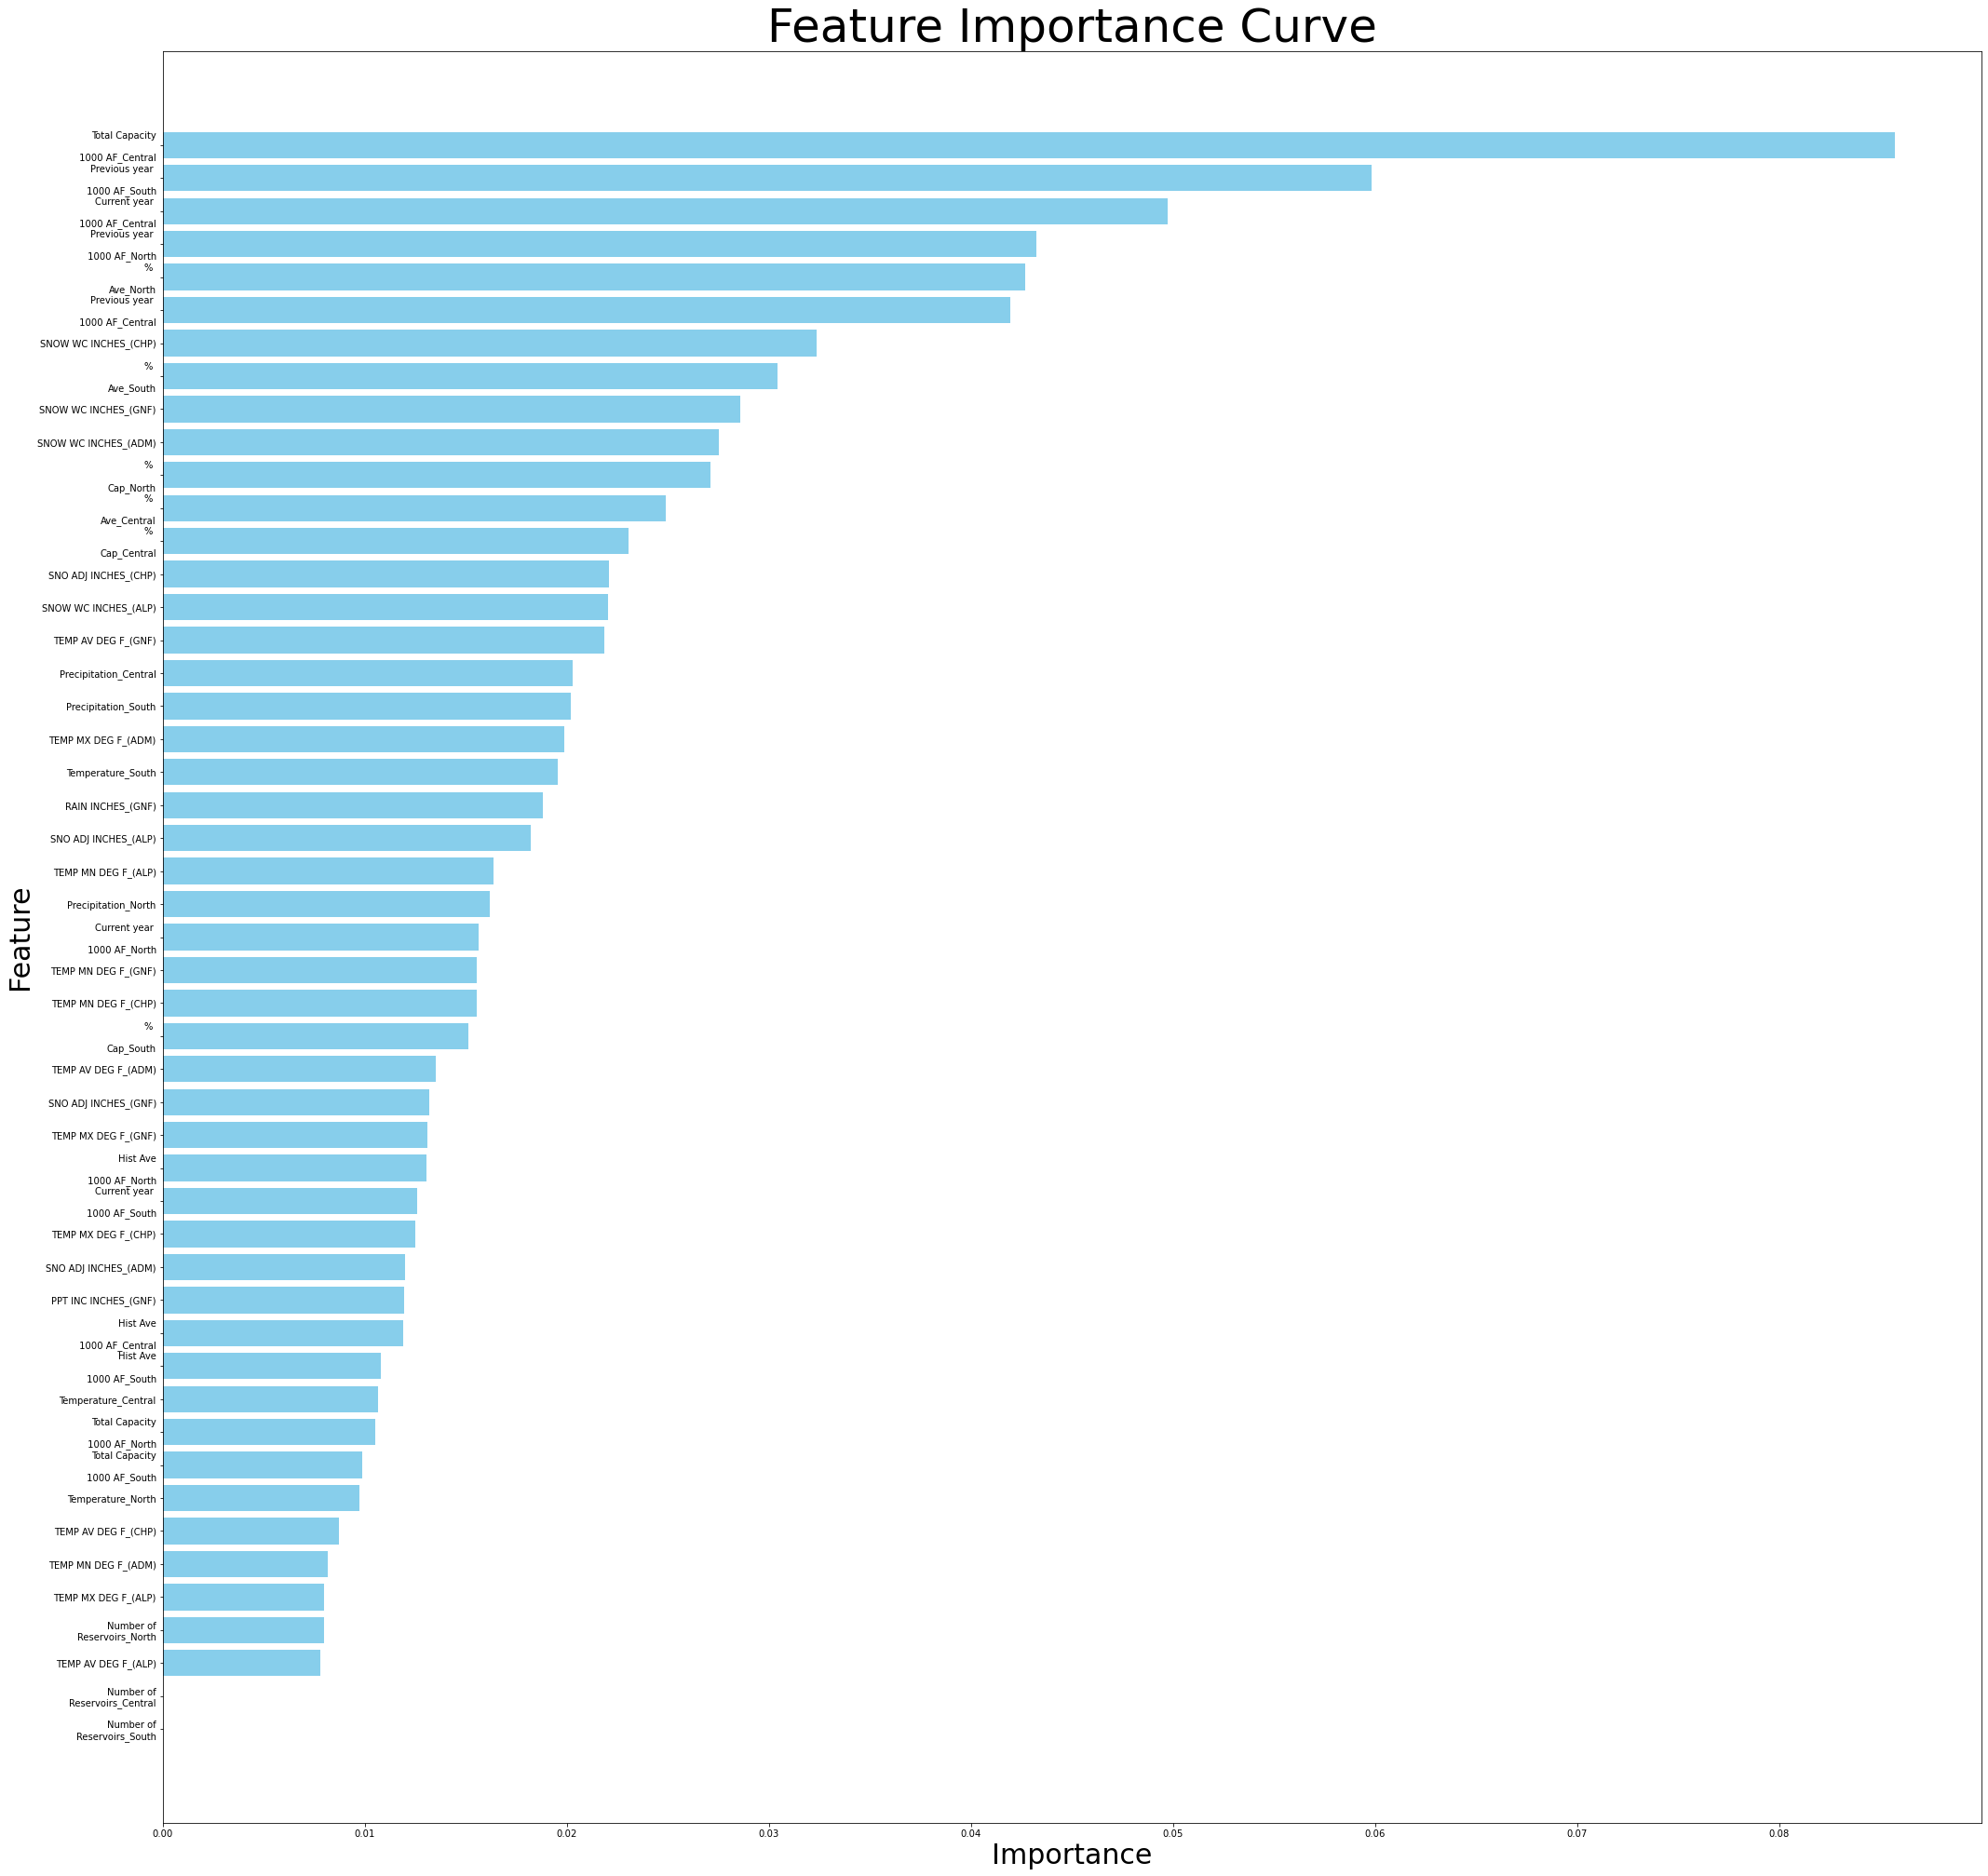

In [301]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print('\nRandom Forest Classifier')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

feature_importances = rfc.feature_importances_
feature_importances

# Convert tuples to strings
feature_names = [f'{feat[0]}_{feat[1]}' if isinstance(feat, tuple) else feat for feat in feature_names]
# Create a DataFrame for easy plotting
features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
features

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(35, 35))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance',size=30)
plt.ylabel('Feature',size=30)
plt.title('Feature Importance Curve',size=50)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [302]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print('\nSupport Vector Machine (SVM)')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
# Extract feature importances
feature_importances = svc.feature_importances_
feature_importances

# Convert tuples to strings
feature_names = [f'{feat[0]}_{feat[1]}' if isinstance(feat, tuple) else feat for feat in feature_names]
# Create a DataFrame for easy plotting
features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
features

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(35, 35))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance',size=30)
plt.ylabel('Feature',size=30)
plt.title('Feature Importance Curve',size=50)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Support Vector Machine (SVM)
Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

       False       0.57      0.50      0.53         8
        True       0.80      0.84      0.82        19

    accuracy                           0.74        27
   macro avg       0.69      0.67      0.68        27
weighted avg       0.73      0.74      0.74        27

[[ 4  4]
 [ 3 16]]


AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_
feature_importances

# Convert tuples to strings
feature_names = [f'{feat[0]}_{feat[1]}' if isinstance(feat, tuple) else feat for feat in feature_names]
# Create a DataFrame for easy plotting
features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
features

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(35, 35))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance',size=30)
plt.ylabel('Feature',size=30)
plt.title('Feature Importance Curve',size=50)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 2].min() - 1,
                     stop = X_set[:, 2].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 2],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA for Classifying Ongoing Drought (train)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

X12_set, y12_set = X12_train, y12_train
X112, X212 = np.meshgrid(np.arange(start = X12_set[:, 0].min() - 1,
                     stop = X12_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X12_set[:, 1].min() - 1,
                     stop = X12_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X112, X212, classifier.predict(np.array([X112.ravel(),
             X212.ravel()]).T).reshape(X112.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X112.min(), X112.max())
plt.ylim(X212.min(), X212.max())

for i, j in enumerate(np.unique(y12_set)):
    plt.scatter(X12_set[y12_set == j, 0], X12_set[y12_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA for Classifying Ongoing Drought (train)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA for Classifying Ongoing Drought (test)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

In [ ]:
twoyear=~drought
twoyear

In [ ]:
twoyeartrain=twoyear.head(108)

In [ ]:

bigdata2=pd.concat([prec.head(108),Res.head(108),mountains1.head(108)],axis=1)
X = bigdata2.iloc[:,0:50].values

y = bigdata2.iloc[:, 49].values
bigdata2

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Ximputed= imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Ximputed, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA for Classifying Two Years Prior to Drought (train)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA for Classifying Ongoing Drought (test)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
distances = euclidean_distances(Ximputed, Ximputed)

# Step 5: Plot the distances as a heatmap
plt.figure(figsize=(7, 7))
plt.imshow(distances, cmap='viridis', origin='lower', extent=[0, len(Ximputed), 0, len(Ximputed)])
plt.colorbar(label='Euclidean Distance')
plt.title('Pairwise Euclidean Distances Between Samples')
plt.xlabel('Months')
plt.ylabel('Months')
plt.show()